 군집화(Clustering)는 비지도학습의 한 예시로, 어떠한 label 없이 데이터 내에서 거리가 가까운 것들끼리 각 군집들로 분류하는 것이다 
 (분류라고 표현했지만, 지도학습인 classification과는 다르다). *

 즉 데이터 내에 숨어있는 패턴, 그룹을 파악하여 서로 묶는 것이라고 할 수 있다. 만약 라벨값이 존재하는 데이터라고 하더라도, 
 같은 라벨 내에서도 얼마든지 다른 군집으로 묶일 가능성이 있다. ***

 군집화 알고리즘에는 K-Means Clustering, Mean Shift, Gaussian Mixture Model, DBSCAN, Agglomerative Clustering 등이 있다. Agglomerative Clustering을 제외한 나머지 알고리즘을 정리해보고자 한다.


# 분류
분류는 지도학습 방법에 속하여 레이블(정답)이 주어졌을 때 레이블을 기반으로 데이터를 나누는 방법을 의미한다. 따라서 머신러닝에서 모델을 학습시킬 때 모델이 제대로 분류하는지를 평가하기 위해 레이블을 제거하고 모델이 예측한 레이블과 실제 레이블을 비교하여 모델의 성능을 판단한다.

# 군집화
반면, 군집화는 비지도학습 방법에 속하여 레이블(정답)이 주어지지 않았을 때 주어진 데이터를 묶는 방법을 의미한다. 정해진 레이블이 없기 때문에 분류와 달리 어떤 레이블에 속할지 예측하기 보다는 이렇게 묶일(군집화 될) 수 있구나 정도만 파악이 가능하며 이 정보가 필요할 경우 군집화 알고리즘을 사용한다.

K-Means Clustering

 K-Means 클러스터링은 클러스터링에서 가장 일반적으로 사용되는 알고리즘으로, 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다. K-Means이므로 K개의 centroid를 지정한다. 이때 가장 가까운 포인트를 선택한다는 점에서 K-Means는 거리 기반 군집화 방법임을 알 수 있다.

 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택한 후, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다.
 
 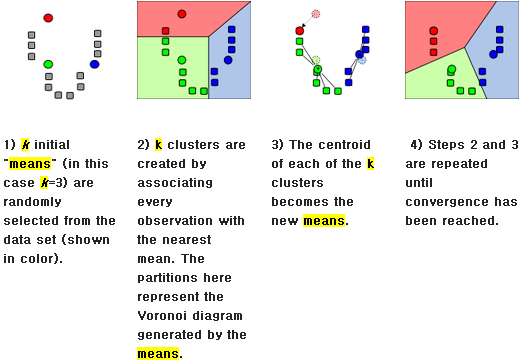

In [56]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, 2:]          # ﻿꽃잎(petal))의 길이(length)와 너비(width) 데이터만 추출
y = iris.target

Text(0, 0.5, 'Petal Length')

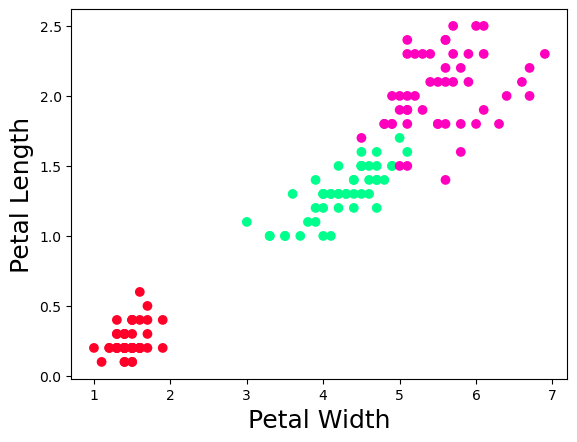

In [57]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c = y, cmap ='gist_rainbow')      # 산점도 그래프 그리기
plt.xlabel('Petal Width', fontsize = 18)                      # x축 이름 설정
plt.ylabel('Petal Length', fontsize = 18)                     # y축 이름 설정


최적의 K를 찾는 방법

K 값이 커지면 K-means Clustering의 성능이 좋아질 것이라고 생각할 수 있습니다. 항상 최적의 군집(클러스터)을 하는 것은 아닙니다. 그러면 최적의 K를 찾는 방법에는 어떤 것이 있을까요?

첫 번째는 K의 값을 늘려보면서 찾아보는 방법입니다. 이 방법은 연구자가 직접 눈으로 군집을 확인하기 때문에 연구자가 원하는 결과를 도출하는 데에는 효과가 있습니다. 하지만 효율은 조금 떨어진다고 생각합니다.

두 번째는 킨크의 스크리 도표를 사용하는 방법(Elbow Method)입니다. 이 방법은 그래프 모양이 팔의 모양과 비슷하게 생겨서 붙여진 이름입니다. 아래 그래프에서 팔의 팔꿈치 부분에 해당하는 값이 최적의 K 값을 의미합니다. 즉, interia(관성)가 감소하는 정도가 낮아지는 부분을 의미합니다. 아래 그래프에서는 3이 최적의 K 값입니다.

c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

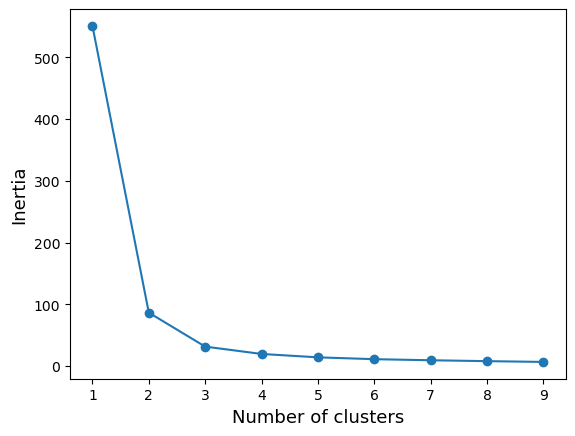

In [58]:
from sklearn.cluster import KMeans

inertia_arr = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters= k, random_state= 21)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertia_arr.append(inertia)

# Elobw Method 그래프 그리기
plt.plot(k_range, inertia_arr, marker= 'o')
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()


c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Predicted')

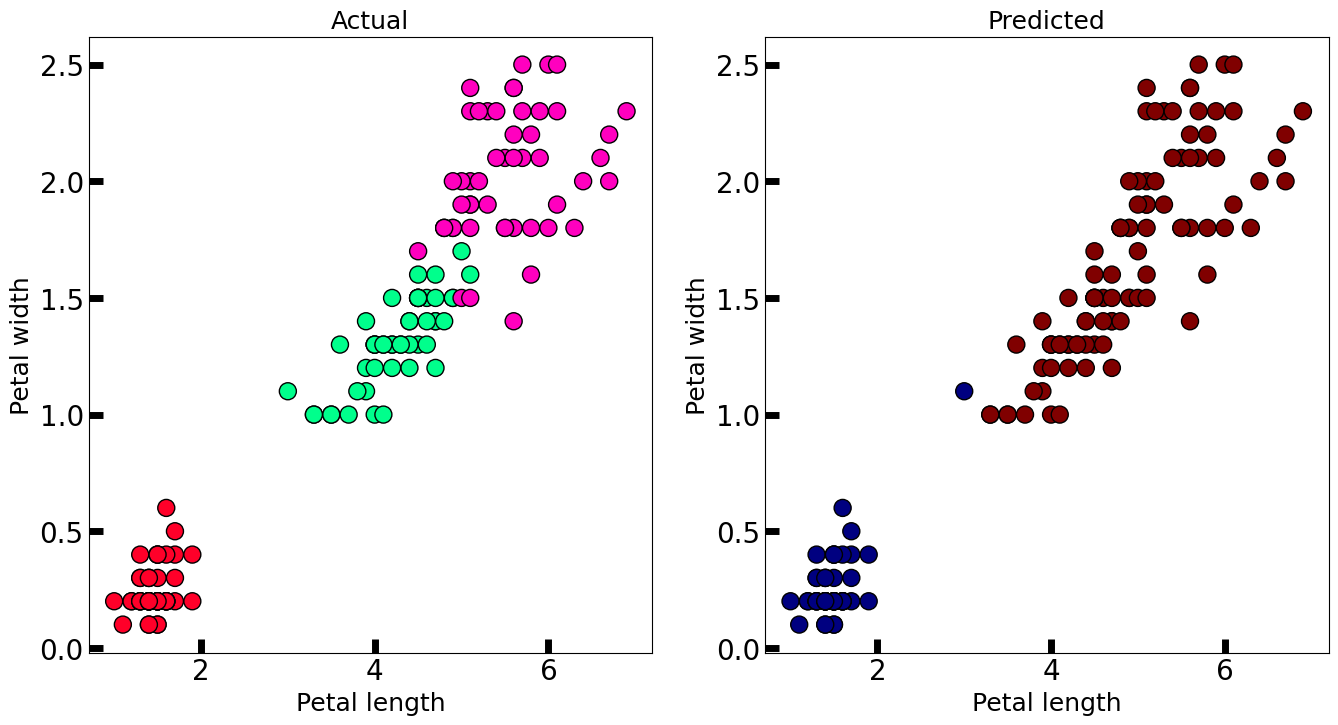

In [59]:
kmeans = KMeans(n_clusters = 2, random_state=21)
kmeans.fit(X)

y_pred = kmeans.labels_

# 비교 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize = (16,8))

# Iris 꽃잎 그래프
axes[0].scatter(X[:, 0], X[:, 1], c = y, cmap = 'gist_rainbow', edgecolor = 'k', s = 150)
axes[0].set_xlabel('Petal length', fontsize = 18)
axes[0].set_ylabel('Petal width', fontsize = 18)
axes[0].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[0].set_title('Actual', fontsize = 18)

# K-Means Clustering을 통해 예측한 결과 그래프
axes[1].scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'jet', edgecolor = 'k', s = 150)
axes[1].set_xlabel('Petal length', fontsize = 18)
axes[1].set_ylabel('Petal width', fontsize = 18)
axes[1].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[1].set_title('Predicted', fontsize = 18)

c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Predicted')

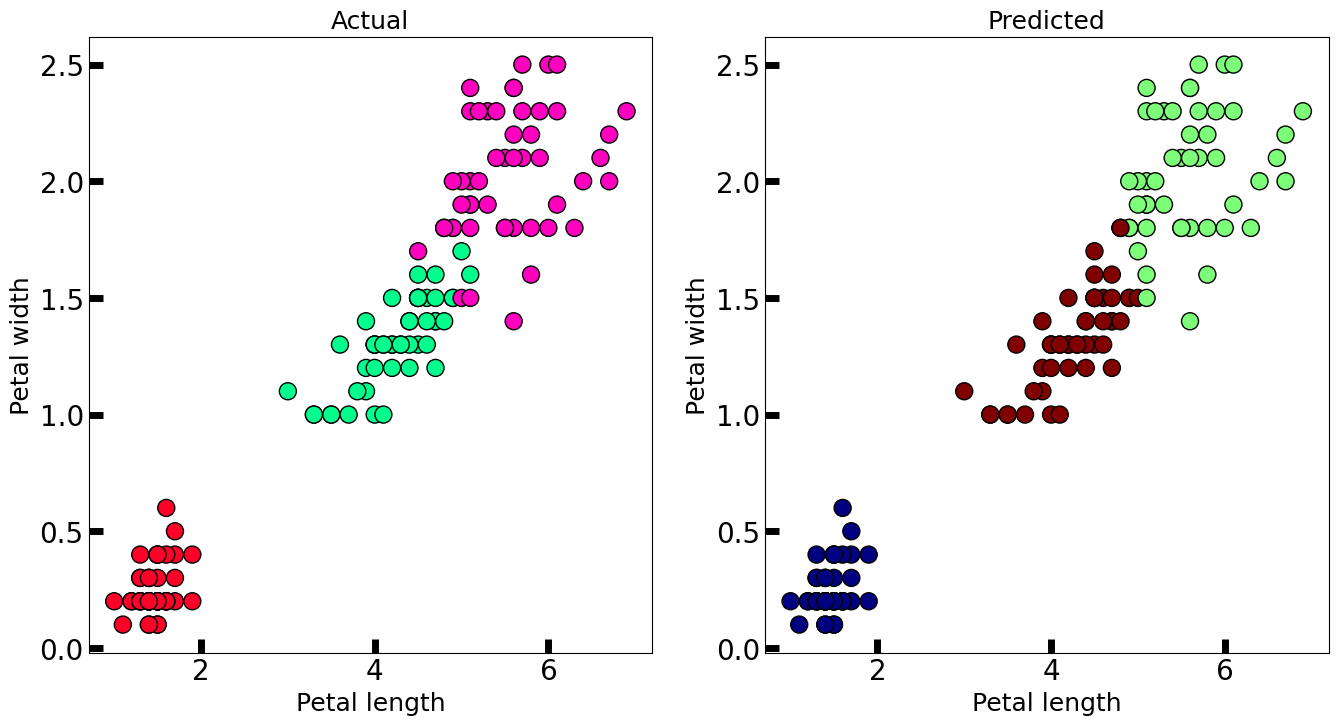

In [60]:
kmeans = KMeans(n_clusters = 3, random_state=21)
kmeans.fit(X)

y_pred = kmeans.labels_

# 비교 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize = (16,8))

# Iris 꽃잎 그래프
axes[0].scatter(X[:, 0], X[:, 1], c = y, cmap = 'gist_rainbow', edgecolor = 'k', s = 150)
axes[0].set_xlabel('Petal length', fontsize = 18)
axes[0].set_ylabel('Petal width', fontsize = 18)
axes[0].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[0].set_title('Actual', fontsize = 18)

# K-Means Clustering을 통해 예측한 결과 그래프
axes[1].scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'jet', edgecolor = 'k', s = 150)
axes[1].set_xlabel('Petal length', fontsize = 18)
axes[1].set_ylabel('Petal width', fontsize = 18)
axes[1].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)
axes[1].set_title('Predicted', fontsize = 18)

Mean Shift

 평균 이동(Mean Shift)은 K-means와 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. 그러나 K-means 방법이 중심에 소속된 데이터의 평균 거리 중심으로 이동을 한다면, Mean Shift는 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다는 점에서 그 차이가 있다. 

  Mean Shift는 특정 대역폭(bandwidth;region of interest)을 가지고 최초의 확률 밀도 중심 내에서 데이터의 확률 밀도가 더 높은 곳으로 중심을 이동한다. (centroid-based algorithm라고 한다)
  
 Mean Shift는 데이터 간의 거리가 아닌 데이터의 분포도를 이용해 군집 중심점을 잡는다. 군집 중심점은 데이터 포인트가 모여 있는 곳이라는 아이디어에 착안한 것이며, 이를 위해 확률 밀도 함수를 이용한다. 일반적으로 확률 밀도 함수를 찾기 위해 KDE(Kernel Density Estimation)를 이용한다. Mean Shift 알고리즘은 임의의 포인트에서 시작해 데이터 내의 확률 밀도 peak 포인트를 찾을 때까지 KDE를 반복적으로 적용하며 군집화를 수행한다.

 Mean Shift 알고리즘은 K-Means와 다르게 군집의 개수를 지정할 필요가 없다. 다만 bandwidth의 크기에 따라 알고리즘 자체에서 군집의 개수를 최적화하므로, bandwidth의 최적화가 필요하다

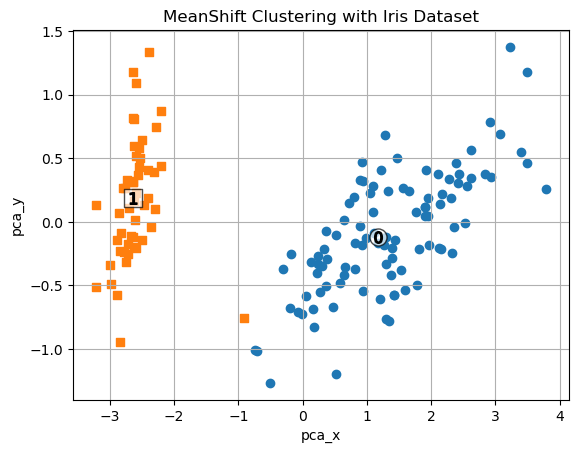

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth

# load_iris
iris = load_iris()
cols = ['sepal_length', 'sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns = cols)
iris_df['target'] = iris.target

# PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)
iris_df[['ftr1','ftr2']] = iris_pca

# MeanShift
best_h = estimate_bandwidth(iris_pca)
meanshift = MeanShift(bandwidth=best_h)
iris_df['meanshift_label'] = meanshift.fit_predict(iris_pca)
centers = meanshift.cluster_centers_

# plot
markers = ['o','s']
for i, mark in enumerate(markers) :
    pca_x = iris_df[iris_df['meanshift_label']==i]['ftr1']
    pca_y = iris_df[iris_df['meanshift_label']==i]['ftr2']
    plt.scatter(pca_x, pca_y, marker=mark)
    plt.scatter(centers[i,0], centers[i,1], marker= mark, s=150, c='white', alpha=0.7, edgecolor='k')
    plt.scatter(centers[i,0], centers[i,1], marker='$%d$'%i, s=70, c='k')

plt.title('MeanShift Clustering with Iris Dataset')    
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.grid()
plt.show()

Cluster Evaluation

 지도학습의 경우 정답값이 존재하기 때문에 분류에는 accuracy, 회귀에는 mse 등을 활용하여 모델의 성능 평가를 쉽게 진행할 수 있다. 하지만 clustering 등의 비지도 학습의 경우에는 정답값이 없기 때문에 정량적으로 정확히 성능을 평가하는 것에는 한계가 있다. 그렇다고 해서 성능 평가 지표가 아예 존재하지 않는 것은 아니고, 군집화의 성능 평가에 있어 대표적인 방법으로 실루엣 분석(silhouette analysis)를 진행한다.

 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다. 여기서 "효율"은 다른 군집과의 거리는 떨어져 있고 동일 군집 간의 데이터는 서로 가깝게 잘 뭉쳐있음을 의미한다. 군집화가 잘 될수록 군집 내의 거리는 가깝고, 군집 간의 거리는 멀 것이다.

 ***

In [62]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
%matplotlib inline

In [63]:
df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
df['target'] = y
df.head()


,ftr1,ftr2,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


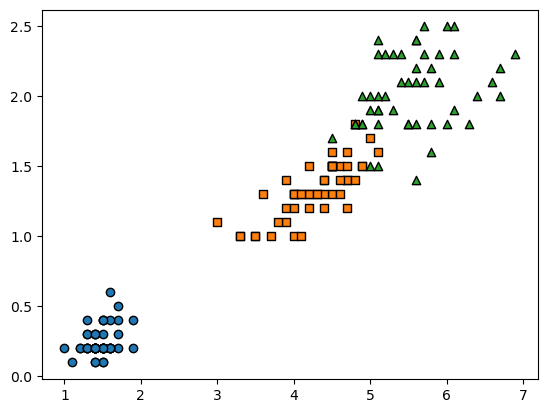

In [64]:
target_list = np.unique(y)
markers = ['o', 's', '^', 'P']
for target in target_list:
    target_cluster = df[df['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

In [65]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
df['kmeans_label'] = cluster_labels
df.head()

c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,ftr1,ftr2,target,kmeans_label
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


In [66]:
from sklearn.metrics import silhouette_score
df['real_silhouette'] = silhouette_score(X=df[['ftr1', 'ftr2']], labels=df['target'])
df['pred_silhouette'] = silhouette_score(X=df[['ftr1', 'ftr2']], labels=df['kmeans_label'])
df.head()

,ftr1,ftr2,target,kmeans_label,real_silhouette,pred_silhouette
0,1.4,0.2,0,1,0.640947,0.66048
1,1.4,0.2,0,1,0.640947,0.66048
2,1.3,0.2,0,1,0.640947,0.66048
3,1.5,0.2,0,1,0.640947,0.66048
4,1.4,0.2,0,1,0.640947,0.66048


In [67]:
display(df.groupby('target')['real_silhouette'].mean())

target
0    0.640947
1    0.640947
2    0.640947
Name: real_silhouette, dtype: float64

지금까지 군집분석의 정의, 군집분석을 평가하는 지표인 실루엣 계수 그리고 파이썬을 이용한 구현 방법에 대해 알아보았습니다. 군집분석은 비즈니스에서 고객 세그멘테이션* 과 같은 과제에 사용될 수 있는데요. 실루엣 계수와 같은 성능지표를 이용하여 알고리즘을 평가하고 강조할 수도 있겠습니다만, 비즈니스에서 더욱 중요한 것은 ***그 군집의 결과를 갖고 어떻게 활용할 것인지***, KPI를 어떻게 얻어낼 것인지임을 놓치지 않으면 좋겠습니다.